<a href="https://colab.research.google.com/github/NataliaCFreitas/Exerc-cios-Garcia/blob/main/Ex_2_carro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import numpy as np
import pymc as pm
import arviz as az
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
pip install ucimlrepo

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X = auto_mpg.data.features
y = auto_mpg.data.targets

# metadata
print(auto_mpg.metadata)

# variable information
print(auto_mpg.variables)


{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

In [26]:
original = auto_mpg.data.original.dropna()

In [27]:
original = original.drop('car_name', axis=1)

In [28]:
auto_mpg.data.original

,car_name,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,"chevrolet,chevelle,malibu",8,307.0,130.0,3504,12.0,70,1,18.0
1,"buick,skylark,320",8,350.0,165.0,3693,11.5,70,1,15.0
2,"plymouth,satellite",8,318.0,150.0,3436,11.0,70,1,18.0
3,"amc,rebel,sst",8,304.0,150.0,3433,12.0,70,1,16.0
4,"ford,torino",8,302.0,140.0,3449,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...,...
393,"ford,mustang,gl",4,140.0,86.0,2790,15.6,82,1,27.0
394,"vw,pickup",4,97.0,52.0,2130,24.6,82,2,44.0
395,"dodge,rampage",4,135.0,84.0,2295,11.6,82,1,32.0
396,"ford,ranger",4,120.0,79.0,2625,18.6,82,1,28.0


Dados faltantes na variavel Horsepower

In [6]:
original = auto_mpg.data.original.dropna()

In [7]:
original = original.drop('car_name', axis=1)

In [8]:
original.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     392 non-null    int64  
 1   displacement  392 non-null    float64
 2   horsepower    392 non-null    float64
 3   weight        392 non-null    int64  
 4   acceleration  392 non-null    float64
 5   model_year    392 non-null    int64  
 6   origin        392 non-null    int64  
 7   mpg           392 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 27.6 KB


In [30]:
original['origin'].unique()

array([1, 3, 2])

In [31]:
X = original.drop(columns=['mpg'])
y = original[['mpg']]
origem = original[['origin']]

In [32]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print(X_scaled_df.head())


   cylinders  displacement  horsepower    weight  acceleration  model_year  \
0   1.483947      1.077290    0.664133  0.620540     -1.285258   -1.625315   
1   1.483947      1.488732    1.574594  0.843334     -1.466724   -1.625315   
2   1.483947      1.182542    1.184397  0.540382     -1.648189   -1.625315   
3   1.483947      1.048584    1.184397  0.536845     -1.285258   -1.625315   
4   1.483947      1.029447    0.924265  0.555706     -1.829655   -1.625315   

     origin  
0 -0.716641  
1 -0.716641  
2 -0.716641  
3 -0.716641  
4 -0.716641  


In [10]:
X_scaled_df.describe()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
count,3.980000e+02,3.980000e+02,3.920000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,-1.785283e-17,-3.570567e-17,-1.812609e-16,-1.606755e-16,-2.677925e-16,-1.642461e-15,-5.355850e-17
std,1.001259e+00,1.001259e+00,1.001278e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-1.204411e+00,-1.444949e+00,-1.520975e+00,-1.604943e+00,-2.747814e+00,-1.627426e+00,-7.151448e-01
25%,-8.563178e-01,-8.563206e-01,-7.665929e-01,-8.828266e-01,-6.328794e-01,-8.150739e-01,-7.151448e-01
50%,-4.314040e-01,-8.563206e-01,-2.853488e-01,-1.973624e-01,-2.472221e-02,-2.721449e-03,-7.151448e-01
75%,6.584879e-01,1.498191e+00,5.600800e-01,7.538337e-01,5.834349e-01,8.096310e-01,5.332220e-01
max,2.511784e+00,1.498191e+00,3.265452e+00,2.565185e+00,3.351912e+00,1.621983e+00,1.781589e+00


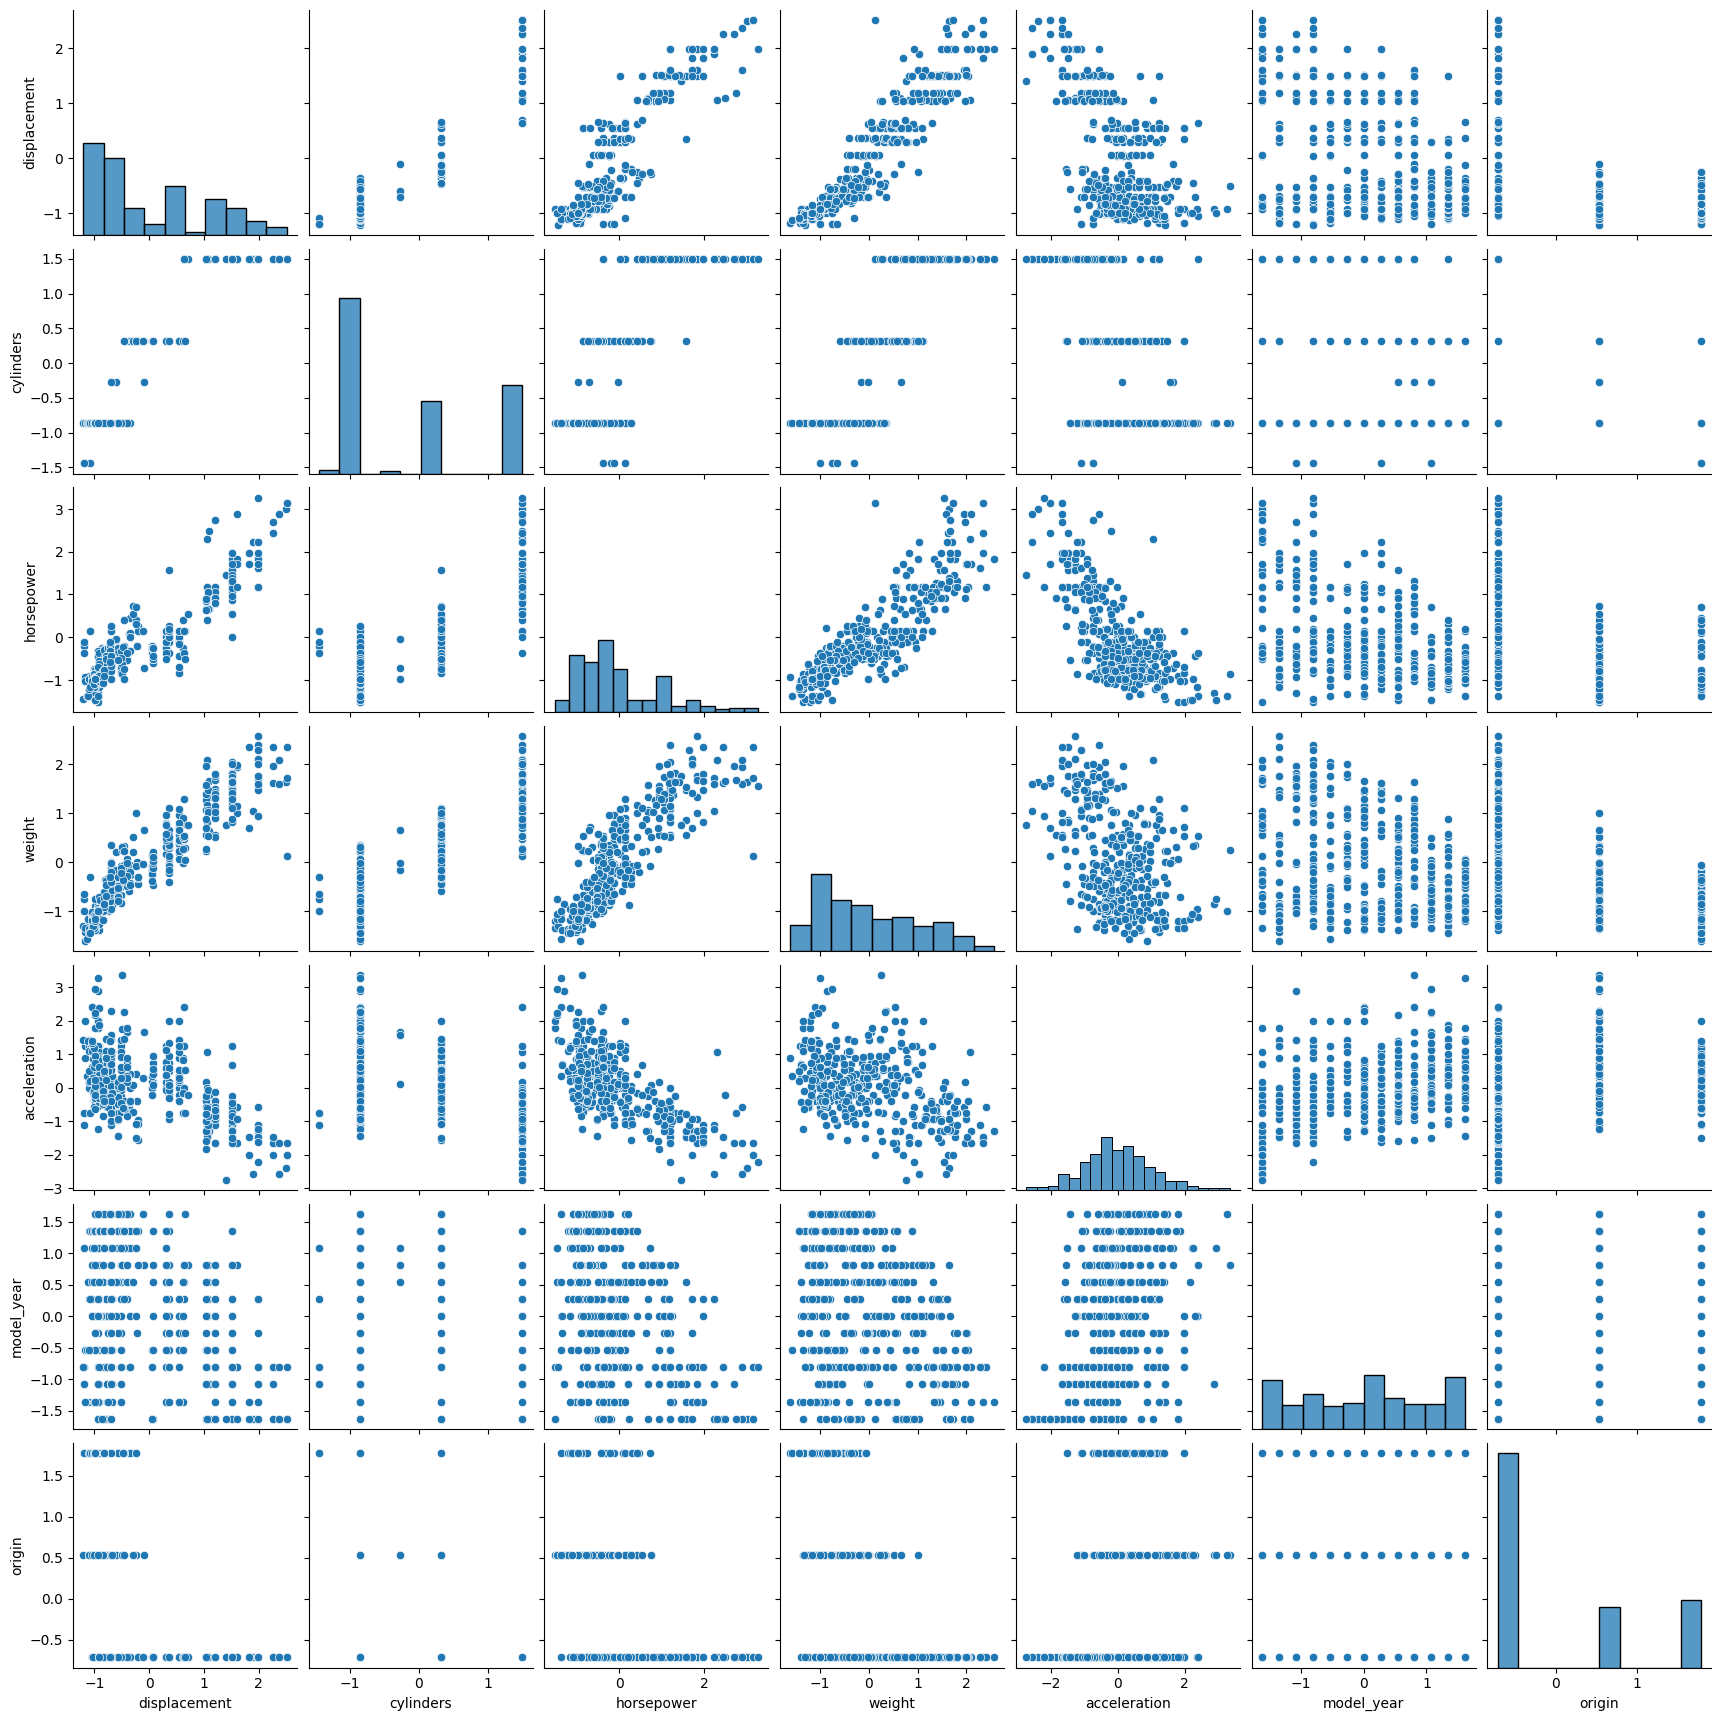

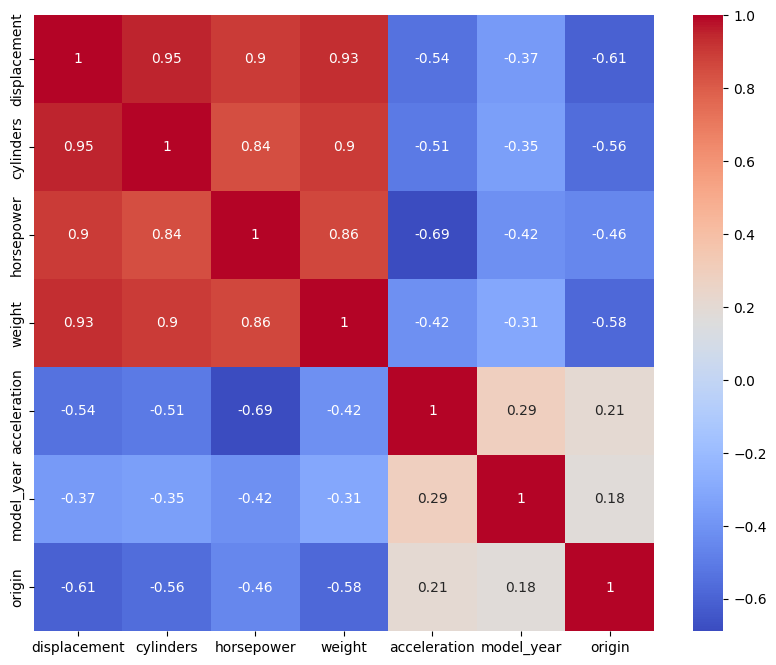

In [12]:
sns.pairplot(X_scaled_df)
plt.show()

corr_matrix = X_scaled_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [33]:
X_train, X_test, y_train, y_test, origin_train, origin_test = train_test_split(X_scaled_df, y, origem, test_size=0.2, random_state=42)

In [34]:
origin_test

,origin
79,2
276,2
248,3
56,1
393,1
...,...
366,1
83,1
115,1
3,1


# O modelo Bayesiano

In [93]:
df = X_train
displacement_train = df['displacement'].values
cylinders_train = df['cylinders'].values
horsepower_train = df['horsepower'].values
weight_train = df['weight'].values
acceleration_train = df['acceleration'].values
model_year_train = df['model_year'].values
origin_train = df['origin'].values

# Modelo Lasso

In [94]:
with pm.Model() as lasso:
  betas = pm.Laplace("betas",0,1,shape=7)
  alpha = pm.Laplace("alpha",20,1)
  eps = pm.HalfNormal("eps",1)

  mu = alpha + (betas[0] * displacement_train +
                betas[1] * cylinders_train +
                betas[2] * horsepower_train +
                betas[3] * weight_train +
                betas[4] * acceleration_train +
                betas[5] * model_year_train +
                betas[6] * origin_train)

  likelihood = pm.Normal("likelihood",mu,eps,observed=y_train.mpg.values)

In [95]:
with lasso:
  trace_priori_lasso = pm.sample_prior_predictive()

In [96]:
with lasso:
  trace_lasso = pm.sample()

pm.summary(trace_lasso)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
betas[0],0.608,0.677,-0.588,1.834,0.017,0.014,1777.0,1281.0,1.0
betas[1],-0.218,0.471,-1.147,0.635,0.011,0.010,1947.0,1307.0,1.0
betas[2],-0.606,0.492,-1.473,0.307,0.013,0.009,1474.0,1527.0,1.0
betas[3],-4.888,0.548,-5.923,-3.851,0.015,0.010,1410.0,1349.0,1.0
betas[4],0.086,0.258,-0.369,0.612,0.006,0.005,1738.0,1297.0,1.0
betas[5],2.775,0.215,2.370,3.165,0.005,0.003,2356.0,1242.0,1.0
betas[6],1.173,0.244,0.718,1.618,0.005,0.004,1981.0,1607.0,1.0
alpha,23.472,0.189,23.128,23.842,0.004,0.002,2868.0,1420.0,1.0
eps,3.309,0.131,3.069,3.569,0.003,0.002,1897.0,1379.0,1.0


# Modelo Ridge

In [97]:
with pm.Model() as ridge:
  betas = pm.Normal("betas",0,1,shape=7)
  alpha = pm.Normal("alpha",20,1)
  eps = pm.HalfNormal("eps", 1)

  mu = alpha + (betas[0] * displacement_train +
                betas[1] * cylinders_train +
                betas[2] * horsepower_train +
                betas[3] * weight_train +
                betas[4] * acceleration_train +
                betas[5] * model_year_train +
                betas[6] * origin_train)

  likelihood = pm.Normal("likelihood",mu,eps,observed=y_train.mpg.values)

In [98]:
with ridge:
  trace_priori = pm.sample_prior_predictive()

Aprendendo parametro

In [99]:
with ridge:
  trace_reg = pm.sample()

pm.summary(trace_reg)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
betas[0],0.216,0.608,-0.920,1.396,0.014,0.012,1800.0,1238.0,1.0
betas[1],-0.456,0.490,-1.394,0.419,0.011,0.009,2094.0,1412.0,1.0
betas[2],-1.060,0.472,-1.972,-0.225,0.012,0.008,1659.0,1563.0,1.0
betas[3],-3.921,0.496,-4.854,-2.987,0.012,0.008,1825.0,1374.0,1.0
betas[4],-0.130,0.267,-0.639,0.361,0.007,0.005,1621.0,1419.0,1.0
betas[5],2.657,0.206,2.257,3.025,0.004,0.003,2130.0,1437.0,1.0
betas[6],1.222,0.235,0.793,1.683,0.005,0.003,2646.0,1465.0,1.0
alpha,23.388,0.185,23.032,23.723,0.003,0.002,3087.0,1523.0,1.0
eps,3.335,0.129,3.095,3.588,0.002,0.002,2729.0,1347.0,1.0


/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


array([[<Axes: title={'center': 'betas'}>,
        <Axes: title={'center': 'betas'}>],
       [<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'eps'}>, <Axes: title={'center': 'eps'}>]],
      dtype=object)

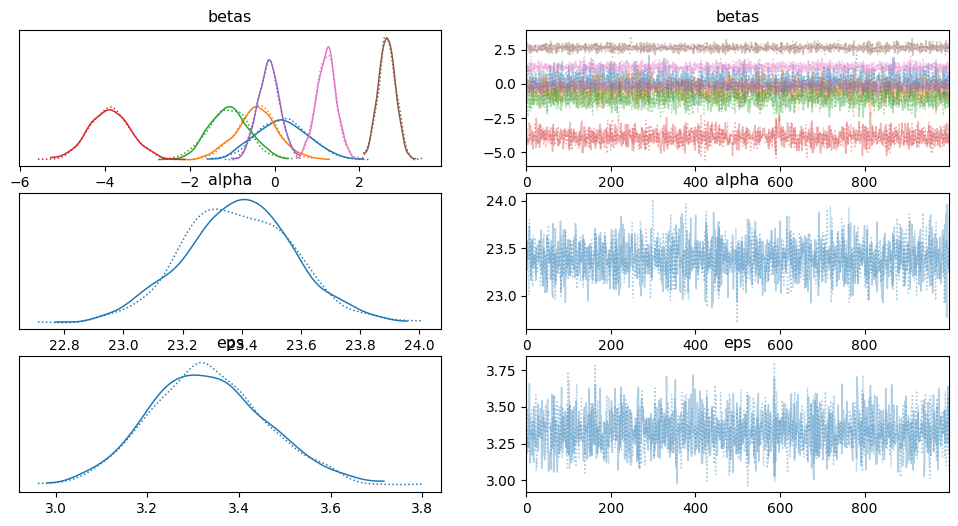

In [43]:
az.plot_trace(trace_reg)

# Análise Preditiva a Posteriori

In [100]:
with lasso:
    trace_lasso_post = pm.sample_posterior_predictive(trace_lasso)

MOdelo Robusta

In [101]:
with pm.Model() as robusta:
  alpha = pm.Normal("a",20,1)
  betas = pm.Normal("betas",0,1,shape=7)

  eps = pm.HalfNormal("eps",1)
  df = pm.Exponential("df",1)

  mu = alpha + (betas[0] * displacement_train +
                betas[1] * cylinders_train +
                betas[2] * horsepower_train +
                betas[3] * weight_train +
                betas[4] * acceleration_train +
                betas[5] * model_year_train +
                betas[6] * origin_train)

  likelihood = pm.StudentT("likelihood",nu=df,mu=mu,sigma=eps,observed=y_train.mpg.values)

In [102]:
with robusta:
  trace_priori_robusta = pm.sample_prior_predictive()

In [103]:
with robusta:
  trace_robusta = pm.sample()

pm.summary(trace_robusta)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,23.194,0.166,22.879,23.498,0.003,0.002,2837.0,1436.0,1.0
betas[0],-0.331,0.621,-1.526,0.836,0.016,0.013,1453.0,1334.0,1.0
betas[1],-0.667,0.479,-1.587,0.184,0.013,0.009,1481.0,1226.0,1.0
betas[2],-0.809,0.450,-1.724,-0.038,0.010,0.008,1852.0,1559.0,1.0
betas[3],-3.384,0.464,-4.317,-2.575,0.012,0.008,1582.0,1371.0,1.0
betas[4],-0.491,0.255,-0.983,-0.033,0.006,0.005,1664.0,1441.0,1.0
betas[5],2.356,0.185,2.003,2.693,0.004,0.003,2371.0,1126.0,1.0
betas[6],1.296,0.233,0.886,1.761,0.005,0.003,2276.0,1353.0,1.0
eps,2.418,0.174,2.083,2.742,0.004,0.003,1550.0,1580.0,1.0
df,3.524,0.791,2.266,4.986,0.021,0.015,1387.0,1551.0,1.0


In [104]:
with robusta:
    trace_robusta_post = pm.sample_posterior_predictive(trace_robusta)

Modelo Multinivel

In [105]:
coords = {"origin":np.unique(origin_train)}
origin_idx = pd.Categorical(origin_train, categories=[1, 2, 3]).codes

In [106]:
with pm.Model(coords=coords) as mn:
  betas = pm.Normal("betas",0,1,shape=6)
  alpha = pm.Normal("alpha",0,1,dims="origin")
  eps = pm.HalfNormal("eps",1)

  mu =  alpha[origin_idx] + (
        betas[0] * displacement_train +
        betas[1] * cylinders_train +
        betas[2] * horsepower_train +
        betas[3] * weight_train +
        betas[4] * acceleration_train +
        betas[5] * model_year_train)

  likelihood = pm.Normal("likelihood",mu,eps,observed=y_train.mpg.values)

In [107]:
with mn:
  trace_priori_mn = pm.sample_prior_predictive()

In [108]:
with mn:
  trace_mn = pm.sample()

pm.summary(trace_mn)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
betas[0],-0.646,0.634,-1.787,0.547,0.016,0.013,1599.0,1438.0,1.00
betas[1],-0.445,0.530,-1.416,0.571,0.012,0.011,2007.0,1359.0,1.00
betas[2],-0.687,0.501,-1.623,0.219,0.011,0.008,1911.0,1151.0,1.00
betas[3],-4.116,0.526,-5.081,-3.096,0.013,0.009,1605.0,1530.0,1.00
betas[4],-0.135,0.289,-0.690,0.387,0.007,0.006,1857.0,1446.0,1.00
betas[5],2.668,0.230,2.223,3.089,0.005,0.004,2176.0,1395.0,1.01
alpha[-0.7166410451853079],0.010,1.017,-1.858,1.900,0.019,0.025,2766.0,1377.0,1.00
alpha[0.526382360622837],0.001,1.019,-1.944,1.878,0.018,0.027,3056.0,1254.0,1.00
alpha[1.769405766430982],22.555,0.212,22.156,22.933,0.005,0.003,2075.0,1498.0,1.00
eps,3.587,0.144,3.326,3.850,0.003,0.002,2126.0,1011.0,1.00


In [109]:
with mn:
    trace_mn_post = pm.sample_posterior_predictive(trace_mn)

Comparação de Modelos

In [110]:
with ridge:
  pm.compute_log_likelihood(trace_reg)

with lasso:
  pm.compute_log_likelihood(trace_lasso)

with robusta:
  pm.compute_log_likelihood(trace_robusta)

with mn:
  pm.compute_log_likelihood(trace_mn)


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

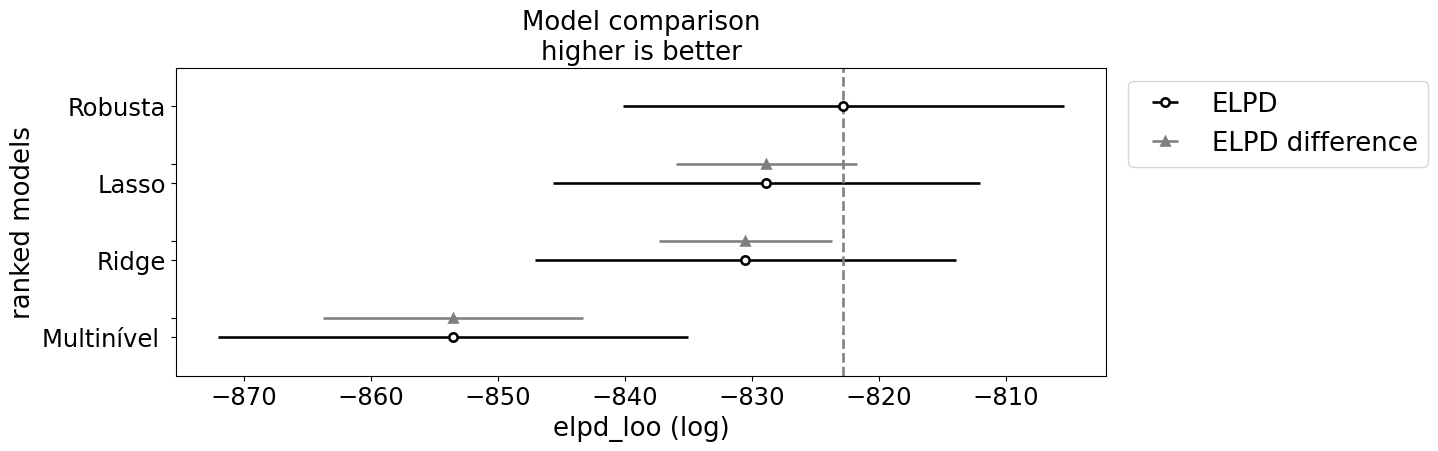

In [111]:
model_compare = az.compare(
    {
        "Ridge": trace_reg,
        "Lasso": trace_lasso,
        "Robusta": trace_robusta,
        "Multinível ": trace_mn,
    }, method='BB-pseudo-BMA'
)
az.plot_compare(model_compare, figsize=(12, 4), insample_dev=False)

In [112]:
model_compare

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
Robusta,0,-822.779314,10.246341,0.000000,0.781937,17.351903,0.000000,False,log
Lasso,1,-828.833669,9.610838,6.054356,0.178432,16.840724,7.155294,False,log
Ridge,2,-830.504534,8.963181,7.725220,0.039617,16.579514,6.828452,False,log
Multinível,3,-853.511226,8.380987,30.731913,0.000015,18.480506,10.251805,False,log


Teste com melhor modelo

In [78]:
with pm.Model() as robusta_mutable:
    disp = pm.MutableData("disp", displacement_train)
    cyl  = pm.MutableData("cyl" , cylinders_train)
    hp   = pm.MutableData("hp"  , horsepower_train)
    wgt  = pm.MutableData("wgt" , weight_train)
    acc  = pm.MutableData("acc" , acceleration_train)
    yar  = pm.MutableData("yar" , model_year_train)
    org  = pm.MutableData("org" , origin_train)
    y    = pm.MutableData("y"   , y_train.mpg.values)
    alpha = pm.Normal("a",20,1)
    betas = pm.Normal("betas",0,5,shape=7)
    eps = pm.HalfNormal("eps",1)
    df = pm.Exponential("df",1)

    mu = alpha + (betas[0] * disp +
                betas[1] * cyl +
                betas[2] * hp +
                betas[3] * wgt +
                betas[4] * acc +
                betas[5] * yar +
                betas[6] * org)

    likelihood = pm.StudentT("likelihood",nu=df,mu=mu,sigma=eps,observed=y)

In [79]:
with robusta_mutable:
  trace_rm = pm.sample()

In [80]:
with robusta_mutable:
    pm.set_data({
        "disp": X_test.displacement.values,
        "cyl" : X_test.cylinders.values,
        "hp"  : X_test.horsepower.values,
        "wgt" : X_test.weight.values,
        "acc" : X_test.acceleration.values,
        "yar" : X_test.model_year.values,
        "org" : X_test.origin.values,
        "y"   : y_test.mpg.values
    })
    trace_post_rm = pm.sample_posterior_predictive(trace_rm)

In [81]:
trace_post_rm

Inference data with groups:
	> posterior_predictive
	> observed_data
	> constant_data

In [82]:
preds = trace_post_rm.posterior_predictive["likelihood"].mean(["chain","draw"]).to_numpy()

In [83]:
rounded_preds = np.round(preds)

df_predictions = pd.DataFrame({
    'Predicted': rounded_preds,
    'Actual': y_test.mpg.values
})

df_predictions['Abs_Difference'] = np.abs(df_predictions['Predicted'] - df_predictions['Actual'])

print(df_predictions.head())
print(df_predictions['Abs_Difference'].sum())

zero_diff_count = (df_predictions['Abs_Difference'] == 0).sum()
print(zero_diff_count)
print(zero_diff_count/len(y_test.mpg.values))


   Predicted  Actual  Abs_Difference
0       26.0    26.0             0.0
1       26.0    21.6             4.4
2       34.0    36.1             2.1
3       24.0    26.0             2.0
4       28.0    27.0             1.0
183.20000000000002
11
0.13924050632911392
